In [1]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [2]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


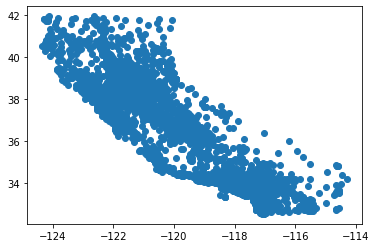

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [4]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [5]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


## KMeans Eğitimi

In [6]:
from sklearn.cluster import KMeans
import seaborn as sns

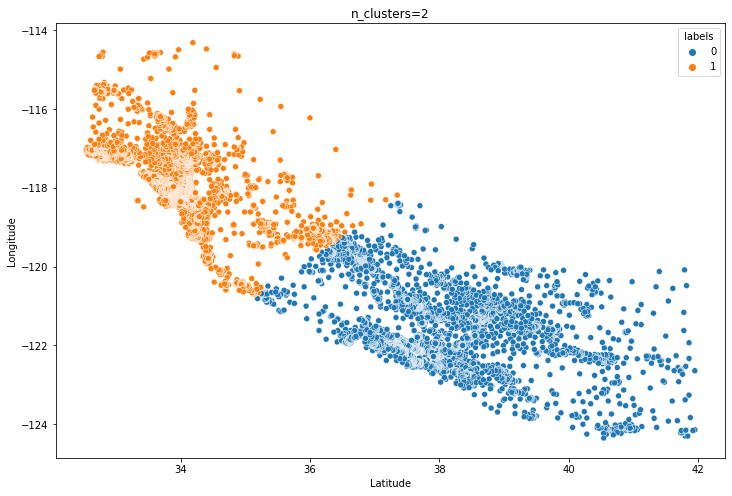

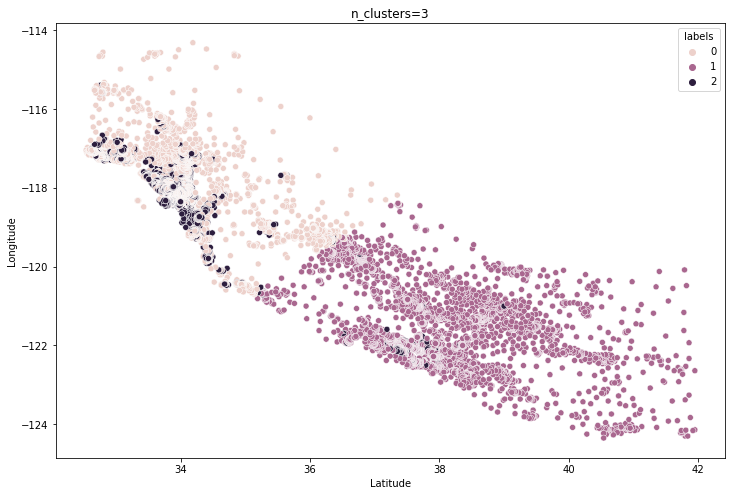

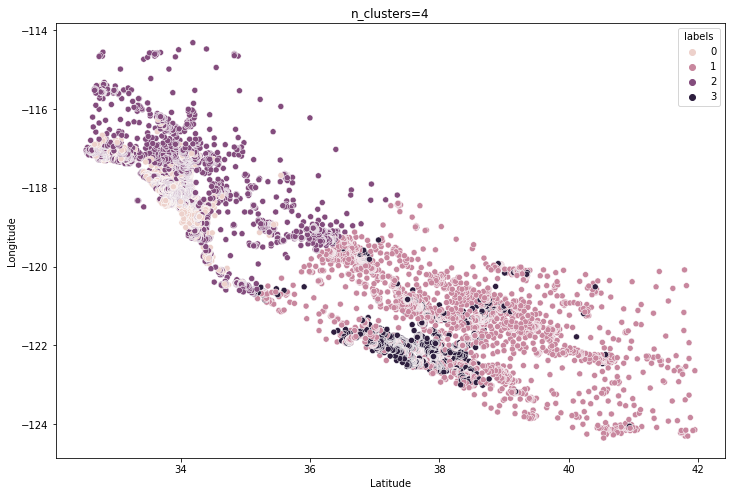

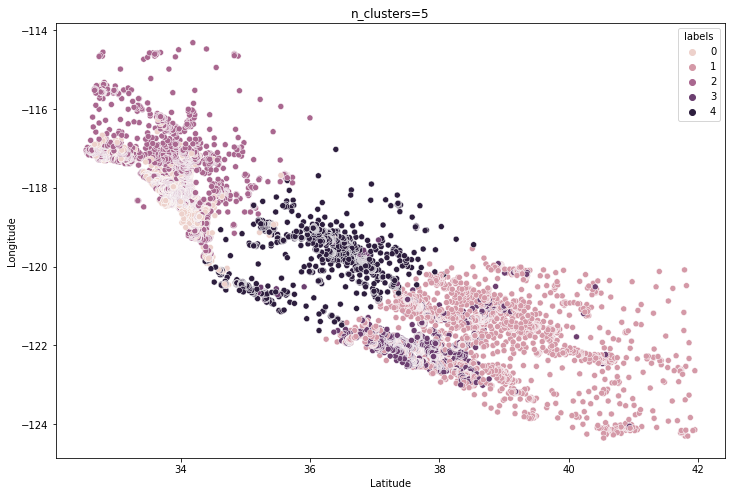

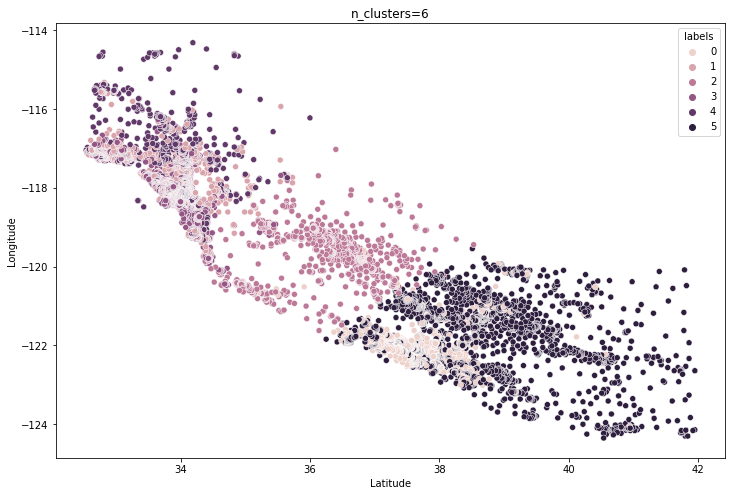

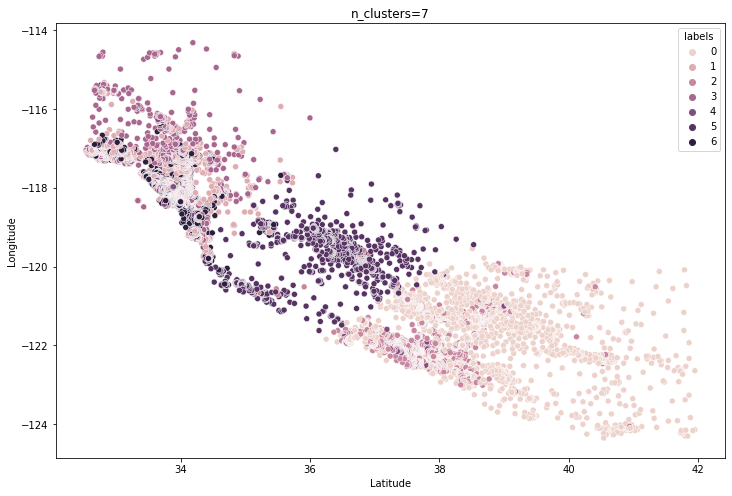

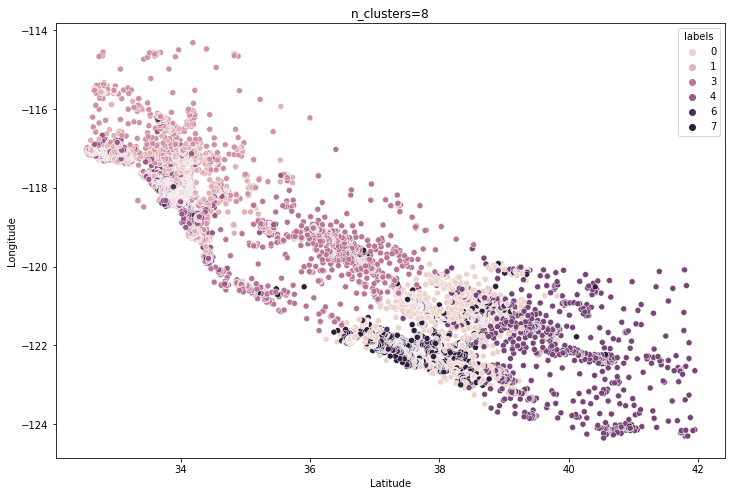

In [7]:
# farklı cluster sayıları için görselleştirme

for n in range(2,9):
    kmeans = KMeans(n_clusters = n)
    clusters = kmeans.fit_predict(X)
    X["labels"] = clusters
    
    plt.figure(figsize=(12,8))
    plt.title(f"n_clusters={n}")
    sns.scatterplot(data=X, x="Latitude", y="Longitude", hue="labels")
    
plt.show()

## Silhouette Skoru

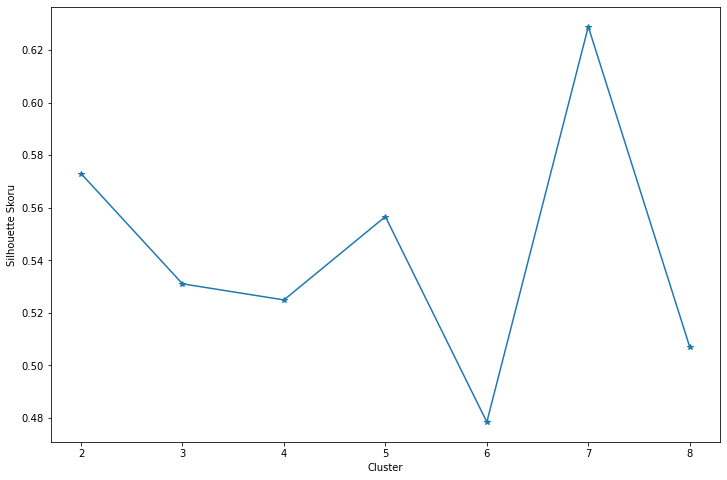

In [8]:
from sklearn.metrics import silhouette_score
import seaborn as sns

silhouette_scores = []

for n in range(2,9):
    kmeans = KMeans(n_clusters=n)
    labels = kmeans.fit_predict(X)
    X["labels"] = labels
    
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)
    
plt.figure(figsize=(12,8))
plt.plot([2,3,4,5,6,7,8], silhouette_scores, "*-")
plt.xlabel('Cluster')
plt.ylabel('Silhouette Skoru')
plt.show()